<a href="https://colab.research.google.com/github/shivaansh81001/191-assignment-3.github.io/blob/main/btc_data_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
path='sample_data/'

In [54]:
TABLE_NAME='bitcoin_data.csv'
data=Table().read_table(path+TABLE_NAME)
data

Date,Price,Open,High,Low,Vol.,Change %
2025-01-03,"98,167.5","96,960.2","98,963.3","96,090.6",61.62K,1.25%
2025-01-02,"96,960.0","94,561.1","97,808.0","94,381.2",76.13K,2.54%
2025-01-01,"94,560.2","93,557.3","95,100.0","92,939.3",43.34K,1.07%
2024-12-31,"93,557.2","92,777.2","96,163.4","92,036.2",74.85K,0.84%
2024-12-30,"92,779.8","93,718.7","94,936.4","91,522.3",112.43K,-1.00%
2024-12-29,"93,716.3","95,282.6","95,315.4","93,026.7",47.71K,-1.65%
2024-12-28,"95,284.5","94,274.9","95,684.3","94,124.7",32.97K,1.07%
2024-12-27,"94,275.9","95,776.4","97,243.3","93,472.8",85.12K,-1.57%
2024-12-26,"95,777.7","99,389.4","99,922.5","95,193.3",74.60K,-3.64%
2024-12-25,"99,391.3","98,661.9","99,514.1","97,651.9",39.80K,0.73%


In [55]:
def format_price(price):
  split_=price.split(',')
  return float(split_[0]+split_[1])

def format_vol(vol):
  split_=float(vol[:-1])*1000
  return split_

def format_change(change):
  return float(change[:-1])

In [56]:
#test format_price
print(format_price('95,284.5'))

#test format_vol
print(format_vol('61.62K'))

95284.5
61620.0


In [57]:
for cols in data.drop('Date','Vol.','Change %').labels:
  #print(cols)
  formatted = data.apply(format_price,cols)
  data = data.with_column(cols,formatted)

formatted_vol = data.apply(format_vol,'Vol.')
data = data.with_column("Vol.",formatted_vol)

formatted_change = data.apply(format_change,"Change %")
data = data.with_column("Change %",formatted_change)

data

Date,Price,Open,High,Low,Vol.,Change %
2025-01-03,98167.5,96960.2,98963.3,96090.6,61620,1.25
2025-01-02,96960,94561.1,97808,94381.2,76130,2.54
2025-01-01,94560.2,93557.3,95100,92939.3,43340,1.07
2024-12-31,93557.2,92777.2,96163.4,92036.2,74850,0.84
2024-12-30,92779.8,93718.7,94936.4,91522.3,112430,-1
2024-12-29,93716.3,95282.6,95315.4,93026.7,47710,-1.65
2024-12-28,95284.5,94274.9,95684.3,94124.7,32970,1.07
2024-12-27,94275.9,95776.4,97243.3,93472.8,85120,-1.57
2024-12-26,95777.7,99389.4,99922.5,95193.3,74600,-3.64
2024-12-25,99391.3,98661.9,99514.1,97651.9,39800,0.73


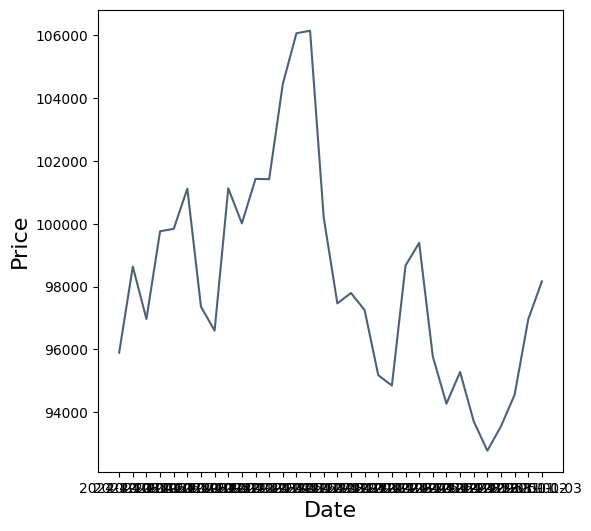

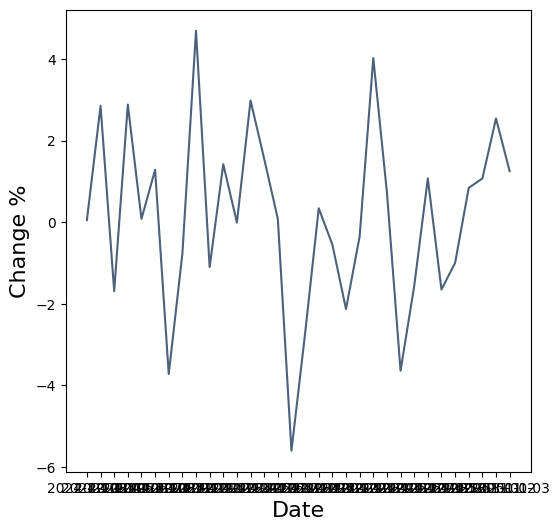

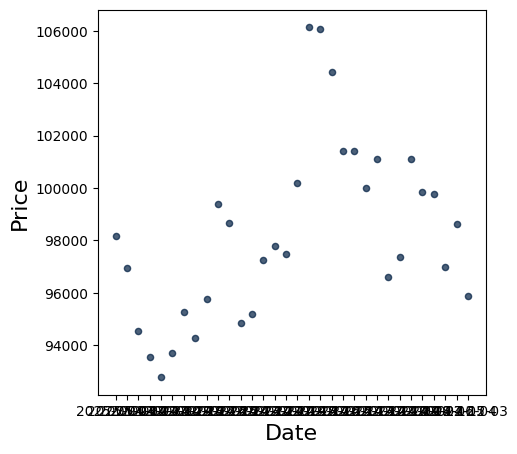

In [62]:
%matplotlib inline

data.plot("Date","Price")

data.plot("Date","Change %")

data.scatter('Date',"Price")


In [66]:
news= Table.read_table(path+'cryptonews.csv').drop('url','source')
news = news.where("subject",are.equal_to("bitcoin"))
news.show(10)


date,sentiment,subject,text,title
2023-12-19 05:25:00,"{'class': 'negative', 'polarity': -0.01, 'subjectivity': ...",bitcoin,"Yonsei found that during BTC’s rally in early December, ...",Is This Why Bitcoin’s Price Rally Was Halted? (CryptoQuant)
2023-12-19 04:50:11,"{'class': 'positive', 'polarity': 0.3, 'subjectivity': 0.1}",bitcoin,"Cathie Wood led ARK Invest fund sold around 809, 441 Gra ...",Cathie Wood’s Ark Invest Sells $27.6 Million in GBTC Sha ...
2023-12-19 04:10:00,"{'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0}",bitcoin,Bitcoin's 150% surge pales in comparison to the staggeri ...,Bitcoin Soared 150% in 2023 But These Companies Did Even ...
2023-12-19 02:59:59,"{'class': 'negative', 'polarity': -0.08, 'subjectivity': ...",bitcoin,The SEC has pushed back its decision on a roster of Ethe ...,"SEC delays several Ethereum ETFs, pushing final decision ..."
2023-12-18 18:33:34,"{'class': 'negative', 'polarity': -0.27, 'subjectivity': ...",bitcoin,"Bitcoin may remain under pressure for a few days, but a ...","Price analysis 12/18: SPX, DXY, BTC, ETH, BNB, XRP, SOL, ..."
2023-12-18 18:15:45,"{'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0}",bitcoin,The ad spot came as the U.S. Securities and Exchange Com ...,Bitwise launches crypto ETF media campaign with ‘The Mos ...
2023-12-18 18:11:43,"{'class': 'positive', 'polarity': 0.3, 'subjectivity': 0.45}",bitcoin,"Bitcoin (BTC), the world's most valuable cryptocurrency, ...",Bitcoin Price Prediction as VanEck’s CEO Says BTC Will H ...
2023-12-18 17:55:00,"{'class': 'positive', 'polarity': 0.2, 'subjectivity': 0.7}",bitcoin,"Since the famous meme post to BitcoinTalk, Bitcoin (BTC) ...",Bitcoiners Celebrate 10th Anniversary Of ‘HODL’ Meme
2023-12-18 17:01:00,"{'class': 'positive', 'polarity': 0.05, 'subjectivity': ...",bitcoin,"CoinShares said the ""mixed regional flows"" are more indi ...",Bitcoin Ends 11-Week Winning Streak With $33M Outflows W ...
2023-12-18 15:42:27,"{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.2}",bitcoin,Digital asset mining firm Hut 8 signed an interim agreem ...,Bitcoin Miner Hut 8 to Build Out Mining Facility in Part ...
